In [2]:
def clean_up(working_directory,timestamps, fail = None):
    if fail != None:
        timestamps = np.delete(timestamps, [fail])
    
    wd_tmp = os.path.join(working_directory,'NationalInstruments')
    
    data_dir = [f for f in os.listdir(wd_tmp) if 'sweepParameter' in f]
    print(data_dir)
    count = 0

    for i in data_dir:
        if 'sweepParameter' in i:
            count += 1
        else:
            count = count
    print(count)
    trials = []
    ids = []
    ts_dict = {}
    #count = 1
    for i in range(count):

        path_tmp = os.path.join(wd_tmp,data_dir[i])
        metaData_tmp = pd.read_pickle(path_tmp)
        trials.append(len(metaData_tmp)*2)
        print(sum(trials))
        ids.append(data_dir[i][:3])
        print(ids)
    if timestamps.shape[0] != sum(trials):
        print('Corrupted timestamps....')

        plt.plot(np.diff(timestamps),'o-')
        #plt.plot((timestamps-timestamps[0]),'o-')
        plt.show()

       
    else:

        for i in range(count):
            ts_dict[ids[i]] = timestamps[:trials[i]]
            timestamps = np.delete(timestamps, [range(trials[i])])    
    return timestamps,ts_dict

In [3]:
import matplotlib.pyplot as plt
#import OpenEphys as oe
import numpy as np#
import pandas as pd
import os
% matplotlib notebook


In [6]:
working_directory = r"Z:\Neuropixel\Thalamus\SNA-035187\2019-07-26_11-19-39"

probe = 1

path = os.path.join(working_directory,r'experiment1\recording1\events\Neuropix-PXI-100.0\TTL_1')#'experiment1/recording1/events/Neuropix-PXI-101.0/TTL_1')

start1 = 1
start2 = 56714929

In [8]:
channel_states = np.load(os.path.join(path,'channel_states.npy'))
timestamps = np.load(os.path.join(path,'timestamps.npy'))# - start1
#channels = np.load(os.path.join(path,'channels.npy'))

In [11]:
timestamps_on = (timestamps[channel_states==1])/30000
timestamps_off = (timestamps[channel_states==-1])/30000


<IPython.core.display.Javascript object>


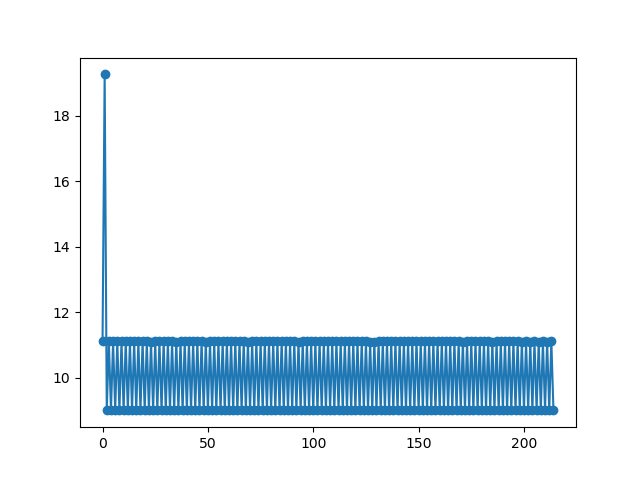

In [18]:
#plt.plot((timestamps_off[:]-timestamps_on[:]),'-o')
plt.plot(np.diff(timestamps_on[:]-timestamps_on[0]),'-o')
plt.show()

In [14]:
timestamps_pattern = timestamps_off[:]-timestamps_on[:]
artefacts = np.where(timestamps_pattern<0.05)[0]

In [15]:
list(artefacts)

[127, 212, 214, 215]

## for deleting timestamps use ts+1 // ts = first wrong ts


In [16]:
#timestamps_off,ts_dict_off = clean_up(working_directory,timestamps_off,fail = 404)
timestamps_on,ts_dict_on = clean_up(working_directory,timestamps_on,fail =list(artefacts))


['001_2019-07-26_11-20-22_sweepParameter']
1
550
['001']
Corrupted timestamps....


In [ ]:
timestamps_on.size

In [ ]:
ts_dict_on['002'] = ts_dict_on['002'] - 9

In [ ]:
ids = list(ts_dict_on.keys())

In [20]:
wd_tmp = os.path.join(working_directory,'NationalInstruments')
    
data_dir = [f for f in os.listdir(wd_tmp) if not '.npy'  in f]
    #print(data_dir)
count = 0

for i in data_dir:
    if 'sweepParameter' in i:
        count += 1
    else:
        count = count

In [21]:
count

1

In [22]:
sweepParameters_path = []
inputData_path = []
[sweepParameters_path.append(os.path.join(wd_tmp,data_dir[i])) for i in range(len(data_dir)) if 'sweepParameter' in data_dir[i]]
[inputData_path.append(os.path.join(wd_tmp,data_dir[i],'AI.npy')) for i in range(len(data_dir)) if 'AI_files_' in data_dir[i]]
    

[None]

In [23]:
sweepParameters_path

['Z:\\Neuropixel\\Thalamus\\SNA-035187\\2019-07-26_11-19-39\\NationalInstruments\\001_2019-07-26_11-20-22_sweepParameter']

In [24]:
inputData_path

['Z:\\Neuropixel\\Thalamus\\SNA-035187\\2019-07-26_11-19-39\\NationalInstruments\\AI_files_001\\AI.npy']

In [25]:
metaData = pd.read_pickle(sweepParameters_path[0])
metaData

,Trials,Baseline Temp,Stimulus Temp,Samplingrate,Sweeplength,Pre Stimulus Time,Stimulus Duration,Repititions,ID,sweepID,OnRamp,OffRamp,PupilFreq,active_zones
0,275,32.0,26.0,1000,20,9,2,25,001,1.0,75,75,40,0011
1,275,32.0,42.0,1000,20,9,2,25,001,10.0,75,75,40,0011
2,275,32.0,32.0,1000,20,9,2,25,001,5.0,75,75,40,0011
3,275,32.0,22.0,1000,20,9,2,25,001,0.0,75,75,40,0011
4,275,32.0,38.0,1000,20,9,2,25,001,8.0,75,75,40,0011
5,275,32.0,36.0,1000,20,9,2,25,001,7.0,75,75,40,0011
6,275,32.0,31.0,1000,20,9,2,25,001,4.0,75,75,40,0011
7,275,32.0,34.0,1000,20,9,2,25,001,6.0,75,75,40,0011
8,275,32.0,40.0,1000,20,9,2,25,001,9.0,75,75,40,0011
9,275,32.0,28.0,1000,20,9,2,25,001,2.0,75,75,40,0011


In [ ]:
for i in range(count):
    
    metaData = pd.read_pickle(sweepParameters_path[i])
    
    pre = metaData['Pre Stimulus Time'][0]
    post = metaData['Sweeplength'][0] - pre
    repetion = metaData['Repititions'][0]
    sweepIDs = np.unique(metaData['sweepID'])
    sweeplength = metaData['Sweeplength'][0]
    
    
        
    input_Data = np.load(inputData_path[i])
    
    #bodytemp = input_Data[1,:,:]
    #feedback_force = input_Data[2,:,:]
    #feedback = input_Data[0,:,:]
    bodytemp = input_Data[0,:,:]
    feedback_force = input_Data[1,:,:]
    feedback_3 = input_Data[2,:,:]
    feedback_4 = input_Data[3,:,:]
    feedback_5 = input_Data[4,:,:]
    feedback_1 = input_Data[5,:,:]
    feedback_2 = input_Data[6,:,:]
     
    
    
    ts_sweepstart = ts_dict_on[ids[i]][::2]
    #ts_sweepstart = ts_sweepstart -1
    ts_stimstart = ts_dict_on[ids[i]][1::2]
    #ts_stimstart = ts_stimstart -4
    
    
    Data = {}
    Data['Sweepstart'] = {}
    Data['Stimstart'] = {}
    Data['Feedback_3'] = {}
    Data['Feedback_4'] = {}
    Data['Feedback_Force'] = {}

    for ii in range(len(sweepIDs)):
        Data['Sweepstart']['{0:02d}'.format(ii)] = ts_sweepstart[metaData['sweepID'] == float(ii)]
        Data['Stimstart']['{0:02d}'.format(ii)] = ts_stimstart[metaData['sweepID'] == float(ii)]
        
        Data['Feedback_3']['{0:02d}'.format(ii)] = feedback_3[:,np.where(metaData['sweepID'] == float(ii))]
        Data['Feedback_4']['{0:02d}'.format(ii)] = feedback_4[:,np.where(metaData['sweepID'] == float(ii))]
        Data['Feedback_Force']['{0:02d}'.format(ii)] = feedback_force[:,np.where(metaData['sweepID'] == float(ii))]
        stimData = pd.DataFrame.from_dict(Data,orient = 'columns')
    stimData.to_pickle(wd_tmp+'/'+ids[i]+'_stimData_probe{}.pkl'.format(probe))

In [ ]:
stimData

In [ ]:
ts_stimstart - ts_sweepstart

In [ ]:
stimData["Feedback_3"]["00"][:,:,:].shape

In [ ]:
% matplotlib inline

for i in range(11)[:]:
    #plt.plot(stimData["Feedback_3"]["0_feedback"][:,0,i])
    #plt.plot(stimData["Feedback_3"]["1_feedback"][:,0,i])
    plt.plot(stimData["Feedback_Force"]["{0:02d}".format(i)][:,0,:])
    #plt.plot(stimData["Feedback_3"]["03"][:,0,i])
    #plt.plot(stimData["Feedback_3"]["04"][:,0,i])
    #plt.plot(stimData["Feedback_3"]["5_feedback"][:,0,i])
    #plt.plot(stimData["Feedback_3"]["6_feedback"][:,0,i])
    #plt.plot(stimData["Feedback_3"]["7_feedback"][:,0,i])
    #plt.plot(stimData["Feedback_3"]["8_feedback"][:,0,i])
    #plt.plot(stimData["Feedback_3"]["9_feedback"][:,0,i])
    #plt.plot(stimData["Feedback_3"]["10_feedback"][:,0,i])
    #plt.plot(stimData["Feedback_3"]["11_feedback"][:,0,i])
    
    plt.show()

In [ ]:
test = r"Y:\Data\PB_DATA\Neuropixel_RawData\JPO-001991\Pre_CNo\2019-10-31_12-01-40\experiment1\recording1\continuous\Neuropix-PXI-100.0"

In [ ]:
os.path.join(test[:-1]+"{}".format(int(test[-1])+1),'continous.dat')

In [ ]:
test

In [ ]:
kilosort_output_directories = [r"F:\NeuropixelData\PWB_TL\processing\JPO-001991\Pre_CNo\2019-10-31_12-01-40\experiment1\recording1\continuous\Neuropix-PXI-100.0",
                            r"F:\NeuropixelData\PWB_TL\processing\JPO-001991\Pre_CNo\2019-10-31_12-01-40\experiment1\recording1\continuous\Neuropix-PXI-100.2"]


probe_type = '3B'



for directory in kilosort_output_directories:

    session_id = os.path.basename(directory)

    print(directory)


    if os.path.exists(os.path.join(directory,'Sorting')):
        files = (os.walk(os.path.join(directory,'Sorting')))
        try:
            os.makedirs(os.path.join(directory,'Sorting',"{}".format(int(files[-1]) + 1)))
        except:
            print('folder already created....')
        kilosort_output_tmp = os.path.join(directory,'Sorting',"{}".format(int(files[-1]) + 1))

    else:
        os.makedirs(os.path.join(directory,'Sorting','1'))
        kilosort_output_tmp = os.path.join(directory,'Sorting','1')

In [ ]:
x = os.listdir(os.path.join(directory,'Sorting'))

In [ ]:
print(x)